<a href="https://colab.research.google.com/github/satyam0999/Data_Science_Projects/blob/main/Projecta/Fish/Data_Science_project_FishMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('Fish.csv')

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.shape

(159, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
features = df[['Height', 'Width']]
features.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [ ]:
labels = df[['Weight']]
labels.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [ ]:
from sklearn.model_selection import train_test_split
# it will return four variables, X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)

In [ ]:
X_train.shape, X_test.shape

((135, 2), (24, 2))

In [ ]:
y_train.shape, y_test.shape

((135, 1), (24, 1))

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predictions = model.predict(X_train)

In [ ]:
r2 = r2_score(y_train, predictions)
print("R2 Score :", r2)

R2 Score : 0.8093614666928417


In [ ]:
predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print("R2 Score :", r2)

R2 Score : 0.6918582725008133


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [ ]:
x=df.iloc[:,[3,4]].values

In [ ]:
x

array([[25.4, 30. ],
       [26.3, 31.2],
       [26.5, 31.1],
       [29. , 33.5],
       [29. , 34. ],
       [29.7, 34.7],
       [29.7, 34.5],
       [30. , 35. ],
       [30. , 35.1],
       [30.7, 36.2],
       [31. , 36.2],
       [31. , 36.2],
       [31.5, 36.4],
       [32. , 37.3],
       [32. , 37.2],
       [32. , 37.2],
       [33. , 38.3],
       [33. , 38.5],
       [33.5, 38.6],
       [33.5, 38.7],
       [34. , 39.5],
       [34. , 39.2],
       [34.5, 39.7],
       [35. , 40.6],
       [35. , 40.5],
       [35. , 40.9],
       [35. , 40.6],
       [36. , 41.5],
       [36. , 41.6],
       [37. , 42.6],
       [38.5, 44.1],
       [38.5, 44. ],
       [39.5, 45.3],
       [41. , 45.9],
       [41. , 46.5],
       [14.1, 16.2],
       [18.2, 20.3],
       [18.8, 21.2],
       [19.8, 22.2],
       [20. , 22.2],
       [20.5, 22.8],
       [20.8, 23.1],
       [21. , 23.7],
       [22. , 24.7],
       [22. , 24.3],
       [22.5, 25.3],
       [22.5, 25. ],
       [22.5,

In [ ]:
hc = AgglomerativeClustering(n_clusters= 5 , affinity= 'euclidean', linkage='ward')

In [ ]:
y_hc = hc.fit_predict(x)

In [ ]:
# visualizing cluster

plt.figure(figsize =(6,6))

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

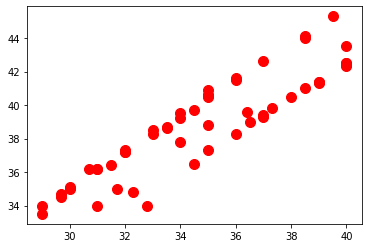

In [ ]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Length1')

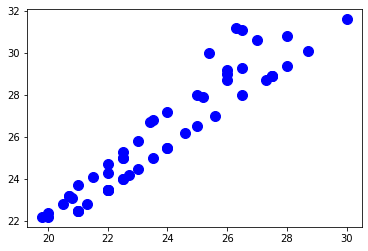

In [ ]:
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Length2')

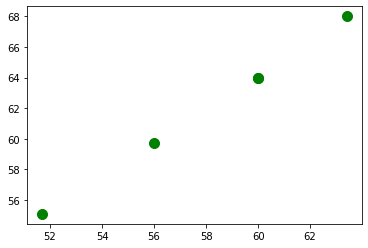

In [ ]:
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Length3')

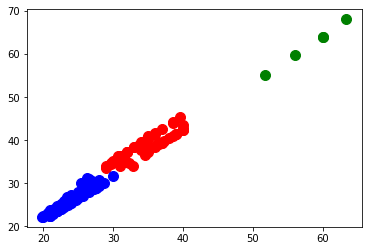

In [ ]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Length1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Length2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Length3')